In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (replace 'dataset1_link' and 'dataset2_link' with the actual links)
dataset1 = pd.read_csv('retail_sales_dataset.csv')
dataset2 = pd.read_csv('menu.csv')
dataset1.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
dataset2.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
print("Descriptive Statistics:")
print(dataset1.describe())

Descriptive Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000



Time Series Analysis:


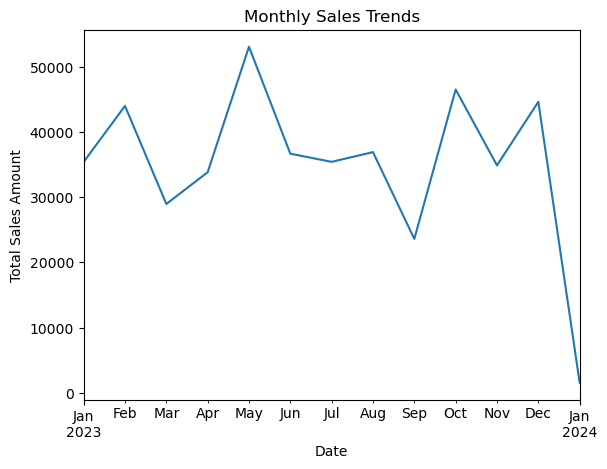

In [4]:
# Time Series Analysis
print("\nTime Series Analysis:")
# Assuming there is a 'date' column
dataset1['Date'] = pd.to_datetime(dataset1['Date'])
time_series_data = dataset1.set_index('Date')
time_series_data['Total Amount'].resample('M').sum().plot()  # Monthly sales trends
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()


In [5]:
print("\nCustomer and Product Analysis:")
# Example: Customer demographics and purchasing behavior
customer_demographics = dataset1.groupby('Customer ID')['Age', 'Gender'].first()
print("Customer Demographics:")
print(customer_demographics.head())



Customer and Product Analysis:
Customer Demographics:
             Age  Gender
Customer ID             
CUST001       34    Male
CUST002       26  Female
CUST003       50    Male
CUST004       37    Male
CUST005       30    Male


C:\Users\jalar\AppData\Local\Temp\ipykernel_5976\709973846.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_demographics = dataset1.groupby('Customer ID')['Age', 'Gender'].first()


In [6]:
product_sales = dataset1.groupby('Product Category')['Total Amount'].sum()
top_selling_products = product_sales.sort_values(ascending=False).head(5)
print("\nTop Selling Product Categories:")
print(top_selling_products)



Top Selling Product Categories:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64



Visualization:


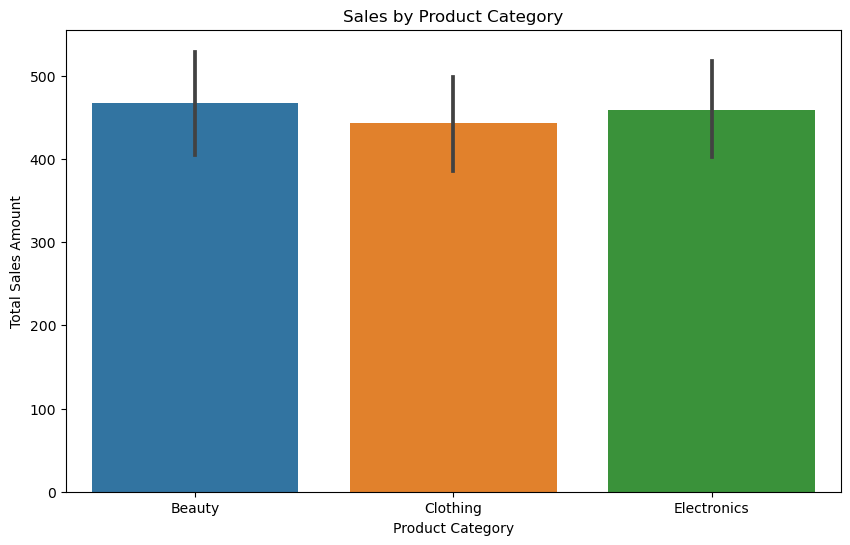

In [7]:
print("\nVisualization:")
# Example: Visualize sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=dataset1)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()